# Klasifikasi Buah dengan Naive Bayes, Decision Tree, dan Perhitungan Gini, IG, Gain Ratio


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math


In [23]:
data = {
    'Berat (gram)': [150, 170, 200, 180, 160, 190],
    'Warna': ['Merah', 'Hijau', 'Kuning', 'Kuning', 'Merah', 'Kuning'],
    'Tekstur': ['Halus', 'Halus', 'Kasar', 'Kasar', 'Halus', 'Kasar'],
    'Jenis': ['Apel', 'Apel', 'Jeruk', 'Jeruk', 'Apel', 'Jeruk']
}

df = pd.DataFrame(data)
df


,Berat (gram),Warna,Tekstur,Jenis
0,150,Merah,Halus,Apel
1,170,Hijau,Halus,Apel
2,200,Kuning,Kasar,Jeruk
3,180,Kuning,Kasar,Jeruk
4,160,Merah,Halus,Apel
5,190,Kuning,Kasar,Jeruk


In [24]:
X = pd.get_dummies(df.drop('Jenis', axis=1))
y = df['Jenis'].map({'Apel': 0, 'Jeruk': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Akurasi Naive Bayes:", accuracy_score(y_test, y_pred_nb))


Akurasi Naive Bayes: 0.0


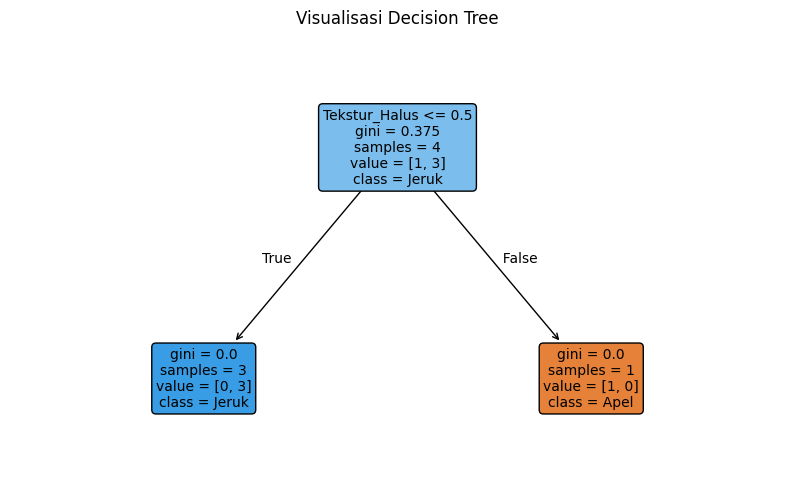

In [26]:
plt.figure(figsize=(10,6))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=['Apel', 'Jeruk'],
    label='all',  # Menampilkan label internal: True / False
    rounded=True,
    fontsize=10   # Ukuran font agar lebih terbaca
)
plt.title("Visualisasi Decision Tree")
plt.show()


In [27]:
def gini_index(groups, classes):
    total_samples = sum([len(group) for group in groups])
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        gini += (1 - score) * (size / total_samples)
    return gini

def entropy(group):
    total = len(group)
    values = set(row[-1] for row in group)
    ent = 0.0
    for val in values:
        p = sum(1 for row in group if row[-1] == val) / total
        ent -= p * math.log2(p)
    return ent

def info_gain(parent, groups):
    total = len(parent)
    parent_entropy = entropy(parent)
    weighted_sum = sum((len(group) / total) * entropy(group) for group in groups)
    return parent_entropy - weighted_sum

def split_info(groups):
    total = sum(len(group) for group in groups)
    split = 0.0
    for group in groups:
        p = len(group) / total
        if p > 0:
            split -= p * math.log2(p)
    return split

def gain_ratio(parent, groups):
    ig = info_gain(parent, groups)
    si = split_info(groups)
    return ig / si if si != 0 else 0


In [28]:
# Data mentah untuk perhitungan manual
data_list = [
    [150, 'Merah', 'Halus', 'Apel'],
    [170, 'Hijau', 'Halus', 'Apel'],
    [200, 'Kuning', 'Kasar', 'Jeruk'],
    [180, 'Kuning', 'Kasar', 'Jeruk'],
    [160, 'Merah', 'Halus', 'Apel'],
    [190, 'Kuning', 'Kasar', 'Jeruk'],
]

# Split berdasarkan fitur Tekstur
group_halus = [row for row in data_list if row[2] == 'Halus']
group_kasar = [row for row in data_list if row[2] == 'Kasar']

# Kelas unik
classes = ['Apel', 'Jeruk']

# Hitung semua metrik
print("Gini Index (Tekstur):", gini_index([group_halus, group_kasar], classes))
print("Information Gain (Tekstur):", info_gain(data_list, [group_halus, group_kasar]))
print("Gain Ratio (Tekstur):", gain_ratio(data_list, [group_halus, group_kasar]))


Gini Index (Tekstur): 0.0
Information Gain (Tekstur): 1.0
Gain Ratio (Tekstur): 1.0


### Kesimpulan:
- Naive Bayes dan Decision Tree berhasil digunakan untuk klasifikasi buah berdasarkan fitur sederhana.
- Decision Tree bisa divisualisasikan dan memperlihatkan aturan klasifikasi secara jelas.
- Perhitungan Gini Index, Information Gain, dan Gain Ratio secara manual memperjelas cara algoritma mengambil keputusan.
